# Implementando Stochastic Gradient Descent e Batch Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

O algoritmo por lote (batch) computa o gradiente com base em todas as amostras de uma base de dados, o que pode ter um elevado custo computacional quando estamos lidando com grandes datasets e vários atributos. Já o gradiente estocástico escolhe aleatóriamente apenas uma amostra da base, diminuindo consideravelmente o custo computacional. A vantagem do gradiente por lote é a garantia de convergência, enquanto que o estocástico não a garante. 

Vamos criar dados artificiais:

In [2]:
x = np.random.rand(1000,3)

noise = np.random.rand(1000)

wc =  np.ones(shape=(3))*3

bc = 10

y = bc + np.dot(wc,x.T) + noise

Resposta correta:

w1 = 3, w2 = 3, w3 = 3; bias = 10

# Implementação Gradiente por Lote:

In [3]:
def gradiente_batch(X, y_, learning_rate_, lotes_):

    w = np.ones(shape=(x.shape[1])) 
    
    b = 0
    
    n_samples = X.shape[0]

    custo = []
    lista_epoch = []
    
    for i in range(lotes_):
        
        y_pred = np.dot(w, X.T) + b

        w_grad = -(2/n_samples)*(X.T.dot(y_-y_pred))
        
        b_grad = -(2/n_samples)*np.sum(y_-y_pred)
        
        w = w - learning_rate_ * w_grad
        
        b = b - learning_rate_ * b_grad
        
        cost = np.mean(np.square(y_-y_pred)) # MSE 
        
        if i%50==0:
            
            custo.append(cost)
            
            lista_epoch.append(i)
        
        
    return w, b, cost, custo, lista_epoch


In [4]:
w, b, custofinal, lista_custo, lista_epochs = gradiente_batch(x, y, learning_rate_=0.1, lotes_=4000)

print('coeficientes w encontrados: ', w,'\n')


print('bias b encontrados: ', b,'\n')


print('coeficientes w esperado: ', '[3, 3, 3]\n')


print('bias b esperado: ', '[10]\n')


coeficientes w encontrados:  [3.03532694 3.04950256 2.98239077] 

bias b encontrados:  10.462480911975906 

coeficientes w esperado:  [3, 3, 3]

bias b esperado:  [10]



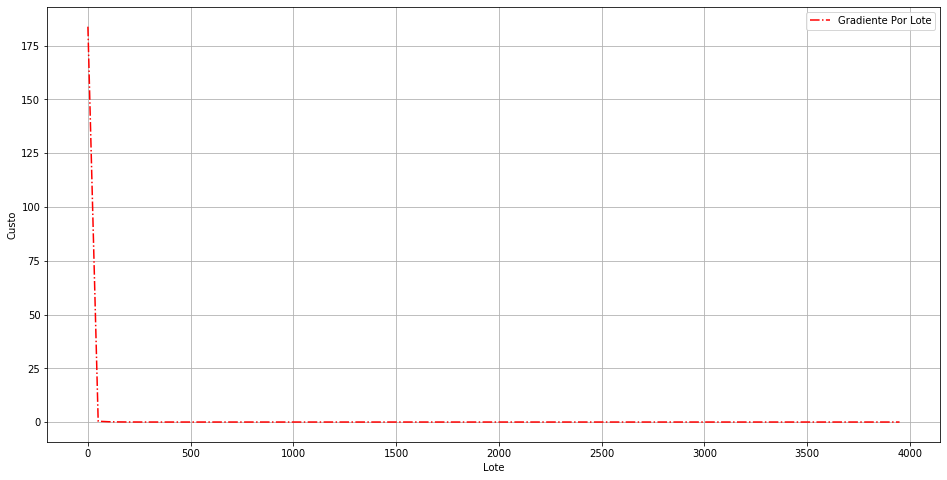

In [5]:
plt.figure(figsize=(16,8))
plt.plot(lista_epochs, lista_custo,'r-.', label='Gradiente Por Lote')


plt.xlabel('Lote')

plt.ylabel('Custo')

plt.grid()

plt.legend()


# Implementação Gradiente Estocástico

In [6]:
import random

def gradiente_estocastico(X, y_, learning_rate_, lotes_):

    w = np.ones(shape=(x.shape[1])) 
    
    b = 0
    
    n_samples = X.shape[0]

    custo = []
    lista_epoch = []
    
    for i in range(lotes_):
        
        index = random.randint(0,999)
        
        y_pred = np.dot(w, X[index].T) + b

        w_grad = -(2/n_samples)*(X[index].T.dot(y_[index]-y_pred))
        
        b_grad = -(2/n_samples)*np.sum(y_[index]-y_pred)
        
        w = w - learning_rate_ * w_grad
        
        b = b - learning_rate_ * b_grad
        
        cost = np.mean(np.square(y_[index]-y_pred)) # MSE 
        
        if i%50==0:
            
            custo.append(cost)
            
            lista_epoch.append(i)
        
        
    return w, b, cost, custo, lista_epoch


In [7]:
w2, b2, custofinal2, lista_custo2, lista_epochs2 = gradiente_estocastico(x, y, learning_rate_=0.2, lotes_=4000)

In [8]:
print('coeficientes w encontrados: ', w2,'\n')


print('bias b encontrados: ', b2,'\n')


print('coeficientes w esperado: ', '[3, 3, 3]\n')


print('bias b esperado: ', '[10]\n')

coeficientes w encontrados:  [4.59176172 4.5896326  4.50627259] 

bias b encontrados:  7.254782075054639 

coeficientes w esperado:  [3, 3, 3]

bias b esperado:  [10]



Text(0, 0.5, 'Custo')

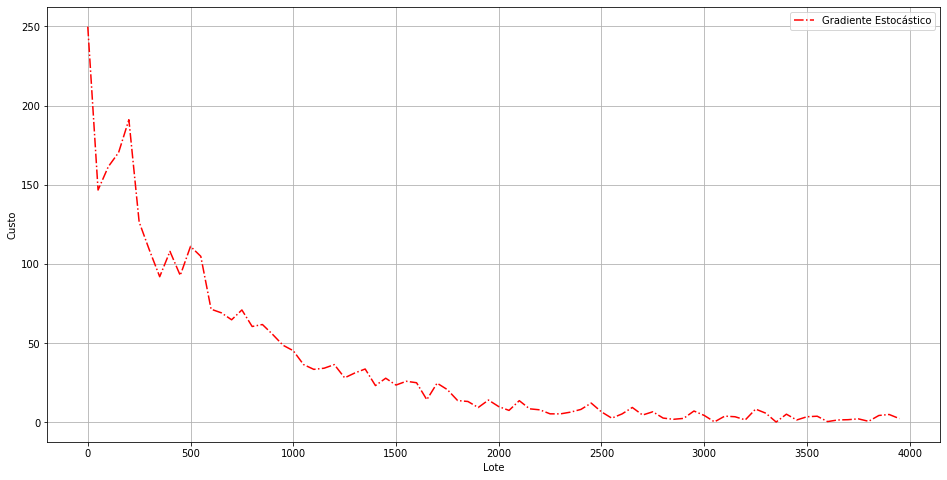

In [9]:
plt.figure(figsize=(16,8))
plt.plot(lista_epochs2, lista_custo2,'r-.', label='Gradiente Estocástico')

plt.grid()

plt.legend()

plt.xlabel('Lote')

plt.ylabel('Custo')


In [10]:
custofinal2

0.038348556713796646

In [11]:
custofinal

0.08345214164812183

# Comparação:

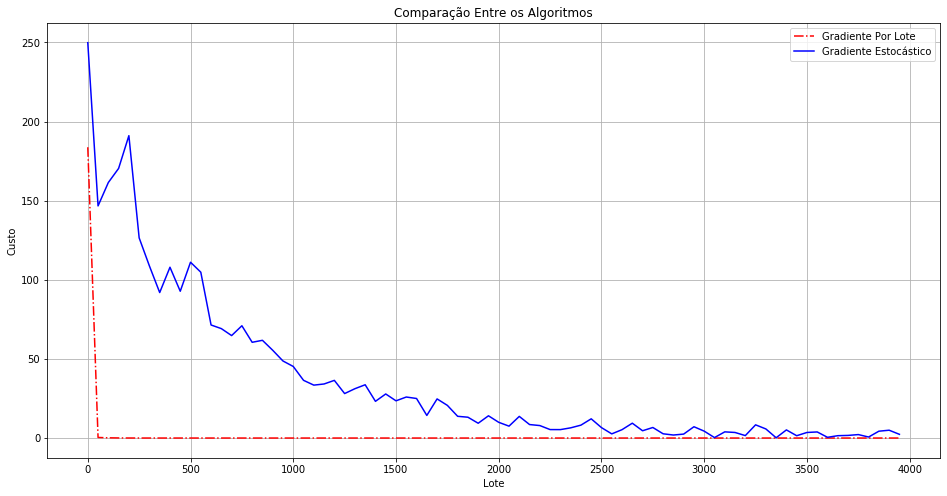

In [13]:
plt.figure(figsize=(16,8))
plt.plot(lista_epochs, lista_custo,'r-.', label='Gradiente Por Lote')

plt.plot(lista_epochs2, lista_custo2,'b-', label='Gradiente Estocástico')

plt.xlabel('Lote')

plt.ylabel('Custo')

plt.title('Comparação Entre os Algoritmos')

plt.grid()

plt.legend()


Pode-se notar pelas curvas que o algoritmo de gradiente por lote apresenta uma convergência mais rápida e uniforme, uma vez que utiliza todos os dados disponíveis no cálculo. Já o algoritmo estocástico, devido a componente aleatória presente na seleção da observação a ser utilizada, apresenta trajeto não uniforme e uma maior demora para chegar próximo ao valor do custo ótimo.

Gradiente Estocástico:

    - Vantagens: Menos dispendioso computacionalmente, capaz de fugir de mínimos locais;
    - Desvantagens: Convergência mais lenta, sem garantia. Apenas se aproxima do ponto ótimo;
        
Gradiente por Lote:

    - Vantagens: Convergência mais rápida, com garantia;       
    - Desvantagens: Dispendioso computacionalmente e possui mais tendência de ficar preso a um ótimo local;